<a href="https://colab.research.google.com/github/Sugirjan/Fare-Classification/blob/master/ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from scipy.stats import randint
from google.colab import files

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import f1_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [28]:
df = pd.read_csv('/content/drive/My Drive/MLAssignment/train.csv');
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17176 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     17176 non-null  int64  
 1   additional_fare            16974 non-null  float64
 2   duration                   16974 non-null  float64
 3   meter_waiting              16974 non-null  float64
 4   meter_waiting_fare         16974 non-null  float64
 5   meter_waiting_till_pickup  16974 non-null  float64
 6   pickup_time                17176 non-null  object 
 7   drop_time                  17176 non-null  object 
 8   pick_lat                   17176 non-null  float64
 9   pick_lon                   17176 non-null  float64
 10  drop_lat                   17176 non-null  float64
 11  drop_lon                   17176 non-null  float64
 12  fare                       17039 non-null  float64
 13  label                      17176 non-null  obj

Drop missing values

In [29]:
# Drop null values
data = df.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 0 to 17175
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tripid                     16968 non-null  int64  
 1   additional_fare            16968 non-null  float64
 2   duration                   16968 non-null  float64
 3   meter_waiting              16968 non-null  float64
 4   meter_waiting_fare         16968 non-null  float64
 5   meter_waiting_till_pickup  16968 non-null  float64
 6   pickup_time                16968 non-null  object 
 7   drop_time                  16968 non-null  object 
 8   pick_lat                   16968 non-null  float64
 9   pick_lon                   16968 non-null  float64
 10  drop_lat                   16968 non-null  float64
 11  drop_lon                   16968 non-null  float64
 12  fare                       16968 non-null  float64
 13  label                      16968 non-null  obj

Feature Extraction

In [30]:
data.pickup_time = pd.to_datetime(data.pickup_time)
data.drop_time = pd.to_datetime(data.drop_time)
data['time_diff'] = data.drop_time - data.pickup_time
data['time_diff'] = data['time_diff'].astype('timedelta64[s]')
data.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

(16968, 15)

In [ ]:
import geopy.distance
data['dist_diff'] = 0

pla = np.array(data.pick_lat)
plo = np.array(data.pick_lon)
dla = np.array(data.drop_lat)
dlo = np.array(data.drop_lon)
t = []

for i,j,k,l in zip(pla,plo,dla,dlo):
  coords_1 = (i, j)
  coords_2 = (k, l)
  t.append(geopy.distance.distance(coords_1, coords_2).km)

data['dist_diff'] = t
data.head()

In [ ]:
data["trip_time"] = data.duration - data.meter_waiting
data.head()

In [ ]:
data["speed"] = data.apply(lambda x : 0 if x.trip_time==0 else x.dist_diff/x.trip_time, axis=1)
data.head()

In [ ]:
data["waiting"] = data.apply(lambda x : 0 if x.meter_waiting_till_pickup==0 else x.meter_waiting_fare/x.meter_waiting_till_pickup, axis=1)
data.head()

In [35]:
data_manipulated = data.copy().drop(['pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon','tripid'], axis=1)
data_manipulated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 0 to 17175
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16968 non-null  float64
 1   duration                   16968 non-null  float64
 2   meter_waiting              16968 non-null  float64
 3   meter_waiting_fare         16968 non-null  float64
 4   meter_waiting_till_pickup  16968 non-null  float64
 5   fare                       16968 non-null  float64
 6   label                      16968 non-null  object 
 7   time_diff                  16968 non-null  float64
 8   dist_diff                  16968 non-null  float64
 9   trip_time                  16968 non-null  float64
 10  speed                      16968 non-null  float64
 11  waiting                    16968 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.7+ MB


In [36]:
data_manipulated.corr()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,fare,time_diff,dist_diff,trip_time,speed,waiting
additional_fare,1.000000,-0.000774,0.197606,0.199606,0.002352,0.315285,-0.000814,-0.000432,-0.803897,-0.000416,0.007202
duration,-0.000774,1.000000,0.969788,0.968667,0.040577,0.865256,0.999993,0.012843,0.151014,-0.006563,0.440934
meter_waiting,0.197606,0.969788,1.000000,0.999474,0.030450,0.870126,0.969778,0.004341,-0.094699,0.002170,0.432631
meter_waiting_fare,0.199606,0.968667,0.999474,1.000000,0.029911,0.865073,0.968657,0.003900,-0.097143,0.002232,0.433829
meter_waiting_till_pickup,0.002352,0.040577,0.030450,0.029911,1.000000,0.045468,0.040652,0.003071,0.042196,0.011435,-0.005247
fare,0.315285,0.865256,0.870126,0.865073,0.045468,1.000000,0.865224,0.033566,0.005000,-0.006347,0.362734
time_diff,-0.000814,0.999993,0.969778,0.968657,0.040652,0.865224,1.000000,0.012825,0.151028,-0.006612,0.440949
dist_diff,-0.000432,0.012843,0.004341,0.003900,0.003071,0.033566,0.012825,1.000000,0.034818,0.385615,0.001631
trip_time,-0.803897,0.151014,-0.094699,-0.097143,0.042196,0.005000,0.151028,0.034818,1.000000,-0.035577,0.046250
speed,-0.000416,-0.006563,0.002170,0.002232,0.011435,-0.006347,-0.006612,0.385615,-0.035577,1.000000,-0.000520


Data visualization

In [ ]:
# for col in data_manipulated.columns:
#   if(col in ['tripid', 'label']): 
#     continue
#   print(col)
#   sns.boxplot(data_manipulated)
# sns.boxplot(data_manipulated.dist_diff)
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_manipulated.dist_diff, data_manipulated.fare)
ax.set_xlabel('Distance')
ax.set_ylabel('Fare')
plt.show()

In [ ]:
# Removed outliers
sns.boxplot(data_manipulated[data_manipulated.dist_diff < 100].dist_diff)
# data_manipulated[data_manipulated.dist_diff > 100].

In [ ]:
data_manipulated.drop(['label'], axis=1).plot(kind='box', figsize=(30,10))

In [ ]:
# Dropping the outlier rows with Percentiles
# data_manipulated_out = data_manipulated
# print(data_manipulated_out.shape)
# cols = ['A4', 'A8', 'A12', 'A16','A20','A24','A28', 'A32']
# for col in cols: 
#   upper_lim = features_data[col].quantile(.999)
#   lower_lim = features_data[col].quantile(.001)
#   features_data = features_data[(features_data[col] < upper_lim)]
#   # features_data = features_data[(features_data[col] > lower_lim)]
# print(features_data.shape)

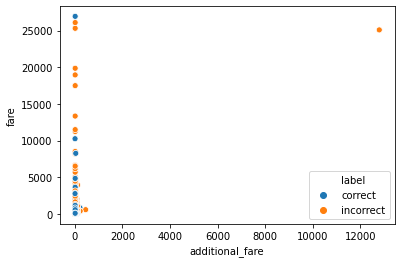

In [ ]:
sns.scatterplot(data_manipulated.additional_fare, data_manipulated.fare, hue='label', data=data_manipulated)
# plt.show()

In [37]:
X = data_manipulated.copy().drop('label', axis=1)
# X = data_manipulated.copy().drop(['label', 'meter_waiting_till_pickup'], axis=1)
# X = data_manipulated.copy().drop(['label', 'time_diff'], axis=1)

t = []

for i in data_manipulated.label:
  if(i == 'correct'):
    t.append(1)
  else:
    t.append(0)

data_manipulated['target'] = t
y = data_manipulated['target']
num_pipeline = Pipeline([('std_scaler', StandardScaler())])
X_tr = num_pipeline.fit_transform(X)
data_manipulated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16968 entries, 0 to 17175
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   additional_fare            16968 non-null  float64
 1   duration                   16968 non-null  float64
 2   meter_waiting              16968 non-null  float64
 3   meter_waiting_fare         16968 non-null  float64
 4   meter_waiting_till_pickup  16968 non-null  float64
 5   fare                       16968 non-null  float64
 6   label                      16968 non-null  object 
 7   time_diff                  16968 non-null  float64
 8   dist_diff                  16968 non-null  float64
 9   trip_time                  16968 non-null  float64
 10  speed                      16968 non-null  float64
 11  waiting                    16968 non-null  float64
 12  target                     16968 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usa

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_tr, y, test_size=0.2,random_state=42, stratify=y)
X_train.shape

(13574, 11)

Logistic Regression

In [39]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) 
print(logreg.score(X_test, y_test))
print(f1_score(y_test, y_pred, average='macro'))
# 0.9239835002946376
# 0.6255234491535862

0.9236888626988804
0.6250435613452512


SGD

In [40]:
sgd = SGDClassifier(loss="hinge", penalty="elasticnet", max_iter=10)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test) 
print(sgd.score(X_test, y_test))
print(f1_score(y_test, y_pred, average='macro'))
# 0.9148497348261638
# 0.5462640308453086

0.9216263995285798
0.6118995173268816


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Random Forest

In [41]:
randomForestselect = SelectFromModel(RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1))
randomForestselect.fit(X_train, y_train)
X_train_rfc = randomForestselect.transform(X_train)
X_test_rfc = randomForestselect.transform(X_test)
rf = RandomForestClassifier(n_estimators=250, random_state=0, n_jobs=-1)
rf.fit(X_train_rfc,y_train)
y_pred = rf.predict(X_test_rfc)
rf.score(X_test_rfc, y_test)
print(rf.score(X_test_rfc, y_test))
print(f1_score(y_test, y_pred, average='macro'))
# 0.9599292869770183
# 0.857375217528872

0.9599292869770183
0.857375217528872


Tree models with LinearSVC feature selection

In [42]:
ls_select = SelectFromModel(LinearSVC(penalty="l1", dual=False))
ls_select.fit(X_train, y_train)
X_train_ls = ls_select.transform(X_train)
X_test_ls = ls_select.transform(X_test)
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train_ls,y_train)
y_pred = rf.predict(X_test_ls)
print('with RF',f1_score(y_test, y_pred, average='macro'))
print('with RF',rf.score(X_test_ls, y_test))
xtc = ExtraTreesClassifier(n_estimators=50)
xtc.fit(X_train_ls,y_train)
y_pred = xtc.predict(X_test_ls)
print('with XTC',f1_score(y_test, y_pred, average='macro'))
print('with XTC', xtc.score(X_test_ls, y_test))
# with RF 0.8404195295651737
# with RF 0.9558043606364172
# with XTC 0.8396457333845222
# with XTC 0.95550972304066

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


with RF 0.8406178545596085
with RF 0.9560989982321745
with XTC 0.8369328367981204
with XTC 0.9549204478491455


Tree models with extraTreesClassifier feature selection

In [49]:
xtc_select = SelectFromModel(ExtraTreesClassifier(n_estimators=50))
xtc_select.fit(X_train, y_train)
X_train_xtc = xtc_select.transform(X_train)
X_test_xtc = xtc_select.transform(X_test)
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train_xtc,y_train)
y_pred = rf.predict(X_test_xtc)
print('with RF',f1_score(y_test, y_pred, average='macro'))
print('with RF',rf.score(X_test_xtc, y_test))
xtc = ExtraTreesClassifier(n_estimators=50)
xtc.fit(X_train_xtc,y_train)
y_pred = xtc.predict(X_test_xtc)
print('with XTC',f1_score(y_test, y_pred, average='macro'))
print('with XTC', xtc.score(X_test_xtc, y_test))
# with RF 0.8490331276261784
# with RF 0.9569829110194461
# with XTC 0.8423323047188345
# with XTC 0.9537418974661167

with RF 0.8609548827033446
with RF 0.9605185621685327
with XTC 0.8534338997159971
with XTC 0.9584560989982321


In [46]:
selector = RFECV(GradientBoostingClassifier(n_estimators=100, max_depth=32, random_state=0))
selector.fit(X_train, y_train)
X_train_Grad_RFE = selector.transform(X_train)
X_test_Grad_RFE = selector.transform(X_test)

gf = GradientBoostingClassifier(n_estimators=100, random_state=0)
gf.fit(X_train_Grad_RFE, y_train)
y_pred = gf.predict(X_test_Grad_RFE)
print('with gf',f1_score(y_test, y_pred, average='macro'))
print('gf', gf.score(X_test_Grad_RFE, y_test))

rf = RandomForestClassifier(n_estimators=100,max_depth=32, random_state=0, n_jobs=-1)
rf.fit(X_train_Grad_RFE,y_train)
y_pred = rf.predict(X_test_Grad_RFE)
print('with rf',f1_score(y_test, y_pred, average='macro'))
print('rf', rf.score(X_test_Grad_RFE, y_test))
# with gf 0.8258051016419848
# gf 0.9540365350618739
# with rf 0.858382013646851
# rf 0.9599292869770183

with gf 0.8258051016419848
gf 0.9540365350618739
with rf 0.858382013646851
rf 0.9599292869770183


In [47]:
parameters = {
    "n_estimators":[300],
    "max_depth":[64],
}
# Tuned Decision Tree Parameters: {'max_depth': 64, 'n_estimators': 300}
rf1 = RandomForestClassifier()
cv_rf = GridSearchCV(rf1,parameters,cv=5)
cv_rf.fit(X_train, y_train)
y_pred = cv_rf.predict(X_test)
print('with cv_rf',f1_score(y_test, y_pred, average='macro'))
print(cv_rf.score(X_test, y_test))
# print("Tuned Decision Tree Parameters: {}".format(cv_rf.best_params_))
# with cv_rf 0.843893528526654
# 0.9566882734236889

with cv_rf 0.841769630955588
0.9560989982321745


In [48]:
selector = RFE(RandomForestClassifier(n_estimators=100, max_depth= 64, n_jobs=-1),step=1)
selector.fit(X_train, y_train)
X_train_Grad_RFELoop = selector.transform(X_train)
X_test_Grad_RFELoop = selector.transform(X_test)
rf = RandomForestClassifier(n_estimators=300, max_depth= 64, n_jobs=-1)
rf.fit(X_train_Grad_RFELoop,y_train)
y_pred = rf.predict(X_test_Grad_RFELoop)
print('with rf',f1_score(y_test, y_pred, average='macro'))
print('rf', rf.score(X_test_Grad_RFELoop, y_test))
# with rf 0.8578805736700473
# rf 0.9599292869770183

with rf 0.858382013646851
rf 0.9599292869770183


For submisssion

In [50]:
test_submission = pd.read_csv('/content/drive/My Drive/MLAssignment/test.csv');
test_submission.shape

(8576, 13)

In [51]:
def downloadTarget(target, fileName):
  submission = pd.DataFrame(target, columns=['prediction'])
  submission['tripid'] = test_submission.tripid
  submission.to_csv(fileName) 
  files.download(fileName)

In [55]:
def feature_selection(data):
  data.pickup_time = pd.to_datetime(data.pickup_time)
  data.drop_time = pd.to_datetime(data.drop_time)
  data['time_diff'] = data.drop_time - data.pickup_time
  data['time_diff'] = data['time_diff'].astype('timedelta64[s]')

  data['dist_diff'] = 0

  pla = np.array(data.pick_lat)
  plo = np.array(data.pick_lon)
  dla = np.array(data.drop_lat)
  dlo = np.array(data.drop_lon)
  t = []

  for i,j,k,l in zip(pla,plo,dla,dlo):
    coords_1 = (i, j)
    coords_2 = (k, l)
    t.append(geopy.distance.distance(coords_1, coords_2).km)

  data['dist_diff'] = t

  data["trip_time"] = data.duration - data.meter_waiting
  data["speed"] = data.apply(lambda x : 0 if x.trip_time==0 else x.dist_diff/x.trip_time, axis=1)
  data["waiting"] = data.apply(lambda x : 0 if x.meter_waiting_till_pickup==0 else x.meter_waiting_fare/x.meter_waiting_till_pickup, axis=1)


  data_manipulated = data.copy().drop(['pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'tripid'], axis=1)
  return data_manipulated

In [53]:
X.shape

(16968, 11)

In [56]:
manipulated_data1 = feature_selection(test_submission)
X_test = manipulated_data1

sc = StandardScaler()
sc.fit(X)
X_tr = sc.transform(X)
X_test_tr = sc.transform(X_test)


In [60]:
xtc_select = SelectFromModel(ExtraTreesClassifier(n_estimators=50))
xtc_select.fit(X_tr, y)
X_train_xtc = xtc_select.transform(X_tr)
X_test_xtc = xtc_select.transform(X_test_tr)

rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train_xtc,y)
y_pred_rfxtc = rf.predict(X_test_xtc)
downloadTarget(y_pred_rfxtc, 'submissionWithRFWithXTC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_test_xtc.shape

In [59]:
parameters = {
    "n_estimators":[300],
    "max_depth":[64],
}
rf1 = RandomForestClassifier()
cv_rf = GridSearchCV(rf1,parameters,cv=5)
cv_rf.fit(X_tr, y)
y_pred_cvrf = cv_rf.predict(X_test_tr)
downloadTarget(y_pred_cvrf, 'submissionWithGSCVWithRF-AF.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
y_pred_cvrf.shape

In [ ]:
selector = RFECV(GradientBoostingClassifier(n_estimators=100, max_depth=32, random_state=0))
selector.fit(X_tr, y)
X_train_Grad_RFE = selector.transform(X_tr)
X_test_Grad_RFE = selector.transform(X_test_tr)

rf = RandomForestClassifier(n_estimators=100,max_depth=32, random_state=0, n_jobs=-1)
rf.fit(X_train_Grad_RFE,y)
y_pred_grf = rf.predict(X_test_Grad_RFE)
downloadTarget(y_pred_grf, 'submissionWithRFWithGBC-wmp.csv')

In [58]:
ls_select = SelectFromModel(LinearSVC(penalty="l1", dual=False))
ls_select.fit(X_tr, y)
X_train_ls = ls_select.transform(X_tr)
X_test_ls = ls_select.transform(X_test_tr)
rf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(X_train_ls,y)
y_pred_rfsvc = rf.predict(X_test_ls)
downloadTarget(y_pred_rfsvc, 'submissionWithRFWithSFM.csv')

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Max voting

In [ ]:
from statistics import mode
final_pred = np.array([])
for i in range(0,len(X_test_tr)):
    final_pred = np.append(final_pred, mode([y_test_xtc[i], y_pred_cvrf[i], y_pred_grf[i]]))
downloadTarget(final_pred, 'submissionWithMaxVoting.csv')